In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
import warnings
warnings.filterwarnings('always')

In [14]:
df=pd.read_csv(r"seed.csv")

In [15]:
df.head()

,Area,Parameter,Compactness,Kernel-Length,Kernel-Width,Asymmetric-Coefficient,Groove-Length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [16]:
df.columns

Index(['Area', 'Parameter', 'Compactness', 'Kernel-Length', 'Kernel-Width',
       'Asymmetric-Coefficient', 'Groove-Length', 'Type'],
      dtype='object')

In [17]:
df.shape

(210, 8)

In [19]:
X= df.drop(columns='Type')
X.head()

,Area,Parameter,Compactness,Kernel-Length,Kernel-Width,Asymmetric-Coefficient,Groove-Length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [20]:
Y=df['Type']
Y=pd.DataFrame(Y)
Y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [21]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [22]:
print(train_X.shape)# Features for training  
print(test_X.shape) # to find accuracy 
print(train_Y.shape) 
print(test_Y.shape)

(147, 7)
(63, 7)
(147, 1)
(63, 1)


In [29]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2,3]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

In [30]:
#1.Logistic Regression
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

C:\Users\pavit\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
logreg_predict= model_1.predict(test_X)
logreg_predict

array([1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 1, 3, 3, 2, 1, 2,
       1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 3, 2,
       3, 1, 3, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 3],
      dtype=int64)

In [44]:
accuracy_score(logreg_predict,test_Y)

0.9523809523809523

In [33]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        29
           2       0.94      1.00      0.97        15
           3       0.90      1.00      0.95        19

    accuracy                           0.95        63
   macro avg       0.95      0.97      0.95        63
weighted avg       0.96      0.95      0.95        63



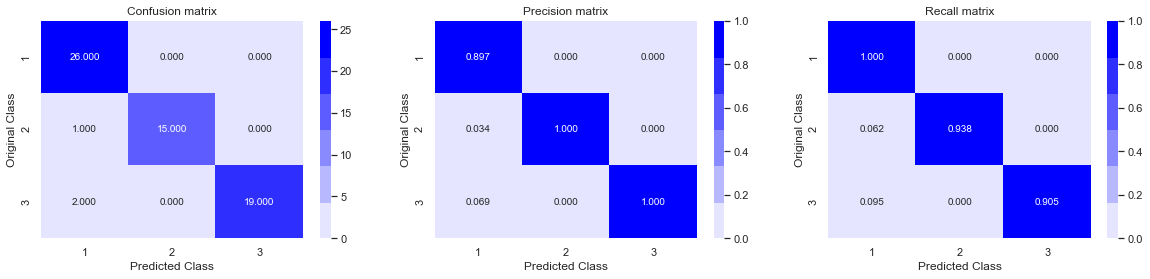

In [34]:
plot_confusion_matrix(test_Y, logreg_predict)

In [39]:
age=input("Area:")
dns=input("Perimeter:")
traffic=input("Compactness:")
rank=input("Kernel Length:")
gi=input("Kernel Width:")
point=input("Assymetric coeff:")
stat=input("Groove length:")
inp=[[int(age),int(dns),int(traffic),int(rank),int(gi),int(point),int(stat)]]
a=logreg.predict(inp)
c=a[0]
if(c==1):
    print("Type of seed is Kama")
elif (c==2):
    print("Type of seed is Rose")
elif (c==3):
    print("Type of seed is Canadien")
else:
    print("Incorrect input details")

Area:2
Perimeter:2
Compactness:2
Kernel Length:2
Kernel Width:2
Assymetric coeff:2
Groove length:2
Type of seed is Canadien
